For this project, resources can be found in the following:

The “.fit” files are fits files in the SDSS spectral format. See
http://classic.sdss.org/dr7/products/spectra/read_spSpec.html to see the structure
of the files and how to get the wavelength array from the values in the header.

Fits files can be read in with python using Astropy’s fits module. Use ‘from astropy.io
import fits’ to import the fits module. See
https://docs.astropy.org/en/stable/io/fits/index.html for help on the fits module.
csv files can be read in with Astropy’s ascii module (‘from astropy.io import ascii’)

For this task, I had to calculate and analyze the blackbody curves of stars, which involved the following steps:

1a)Creating a Python Function for the Blackbody Curve:
I wrote a Python function to calculate the blackbody function as a function of wavelength for any input temperature. The function includes comments explaining the units of each constant used. The output spectrum's units were determined as part of this step.

1b)Determining the Temperature Range for Main Sequence Stars:
I researched and identified the typical temperature range for stars in each of the stellar spectral classes: O, B, A, F, G, K, and M.

1c)Plotting Blackbody Curves for Different Stellar Classes:
Using the Python function developed in step 1, I plotted the blackbody curves in the optical wavelength range (3500–9000 Å) for each stellar spectral class. Each curve was labeled with the corresponding temperature assumed for that spectral class.


In [34]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.wcs import WCS
from astropy.io import fits
from astropy import units as u
from astropy import constants as c
from astropy.io.fits import getdata
from scipy.optimize import curve_fit

# 1. (a)

In [35]:
def B_lambda(Lambda , Temp):
    #converting the inputs
    Lambda_m = Lambda.to(u.m) #meters
    Temp_K = Temp.to(u.K)     #Kelvin 
    
    #constants
    Plank = c.h               #Joule second
    Boldzmann = c.k_B         #Joule per Kelvin
    light = c.c               #meters per second
    
    a = (2 * Plank * (light ** 2)) / (Lambda_m ** 5)
    b = 1 / (np.exp((Plank * light) / (Lambda * Boldzmann * Temp_K)) - 1)
    
    return a * b   # The units of the output is Joule per (second * meter cubed) or Watt per meter cubed

# 1.(c)

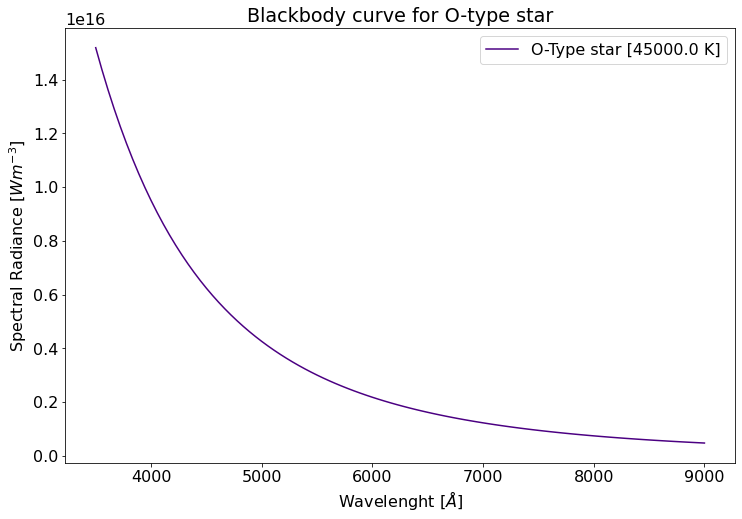

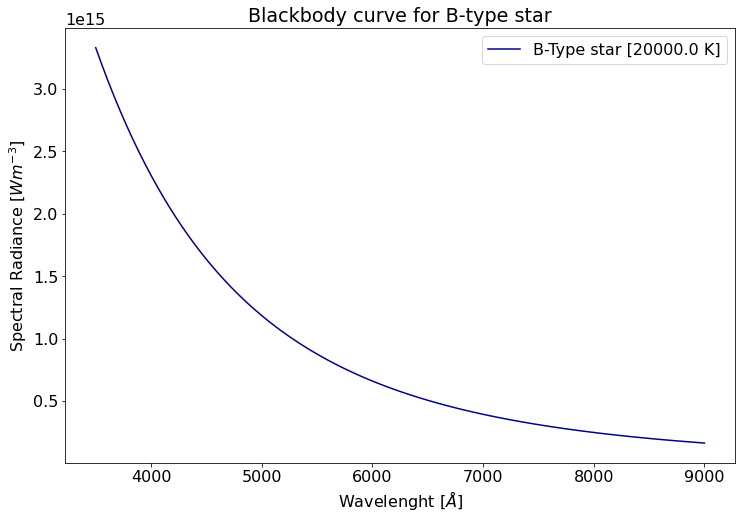

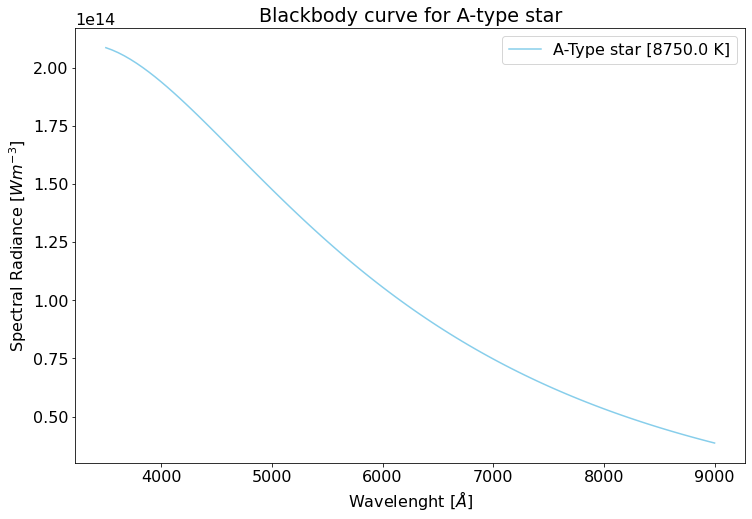

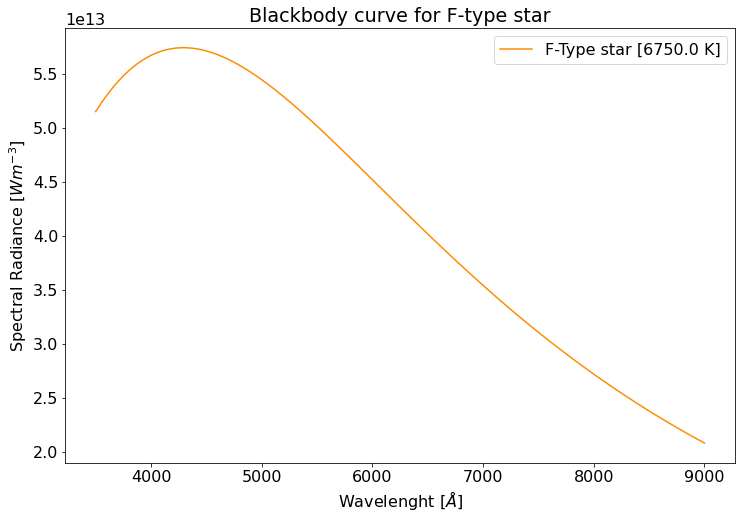

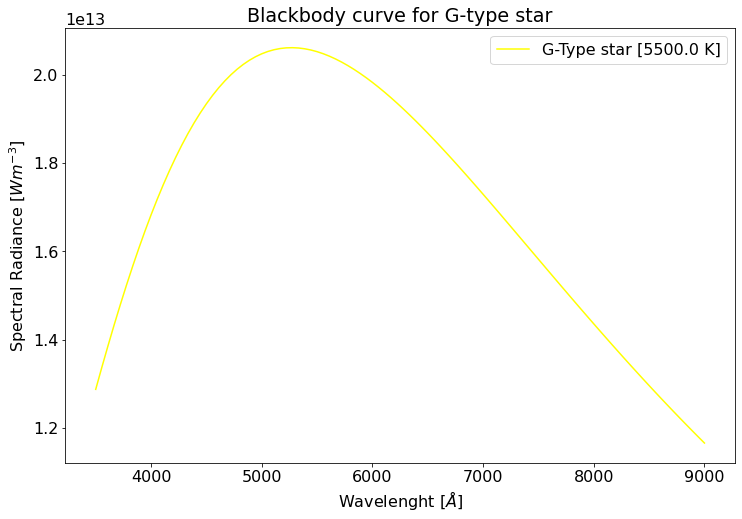

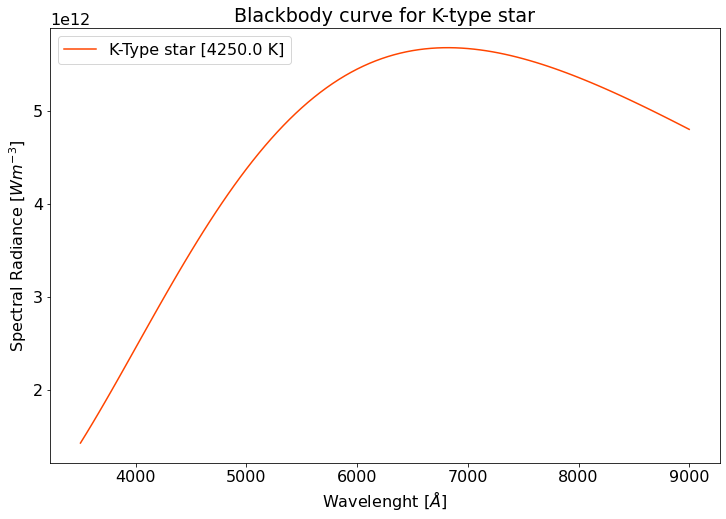

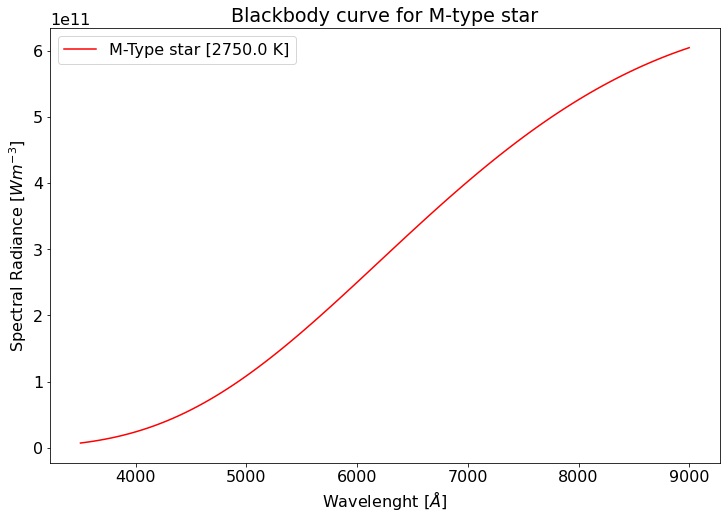

In [36]:
wavelength = (np.linspace(3500 , 9000 , 100)) * u.Angstrom

def plotting_func ():  
    spectral_class = ['O' , 'B' , 'A' , 'F' , 'G' , 'K' , 'M']
    stellar_temp = np.array([45000 , 20000 , 8750 , 6750 , 5500 , 4250 , 2750]) * u.K
    colour = ['indigo' , 'darkblue' , 'skyblue' , 'darkorange' , 'yellow' , 'orangered' , 'red' ]
    
    for i in range(7):    
        name = '{}-Type star [{}]'.format(spectral_class[i] , stellar_temp[i])
        
        plt.figure(figsize = (12, 8))
        plt.rcParams['font.size'] = '16'
        plt.plot(wavelength , B_lambda(wavelength , stellar_temp[i]) , label = name , color = colour[i])
        plt.title('Blackbody curve for {}-type star'.format(spectral_class[i]))
        plt.xlabel('Wavelenght [$\AA$]')
        plt.ylabel('Spectral Radiance [$W m^{-3}$]')
        
        plt.legend()
        plt.show()
        
plotting_func()

2. On these next steps, I worked on analyzing the spectra of five stars and their stellar spectral types by performing the following steps:

2a)Plotting the Spectra of Five Stars:
I plotted the spectra for the five stars using the provided data files (star_data/star*.fit). Each spectrum was visualized to display the intensity as a function of wavelength.

2b)Identifying and Marking Spectral Lines:
I identified the main spectral lines present in each spectrum and marked them on the respective plots for clarity.

2c)Fitting Blackbody Curves to Estimate Temperatures:
Using the blackbody function I developed earlier, I overlaid blackbody curves on each spectrum. This allowed me to estimate the temperature of each star based on its spectral shape and intensity distribution.

# 2.(a)

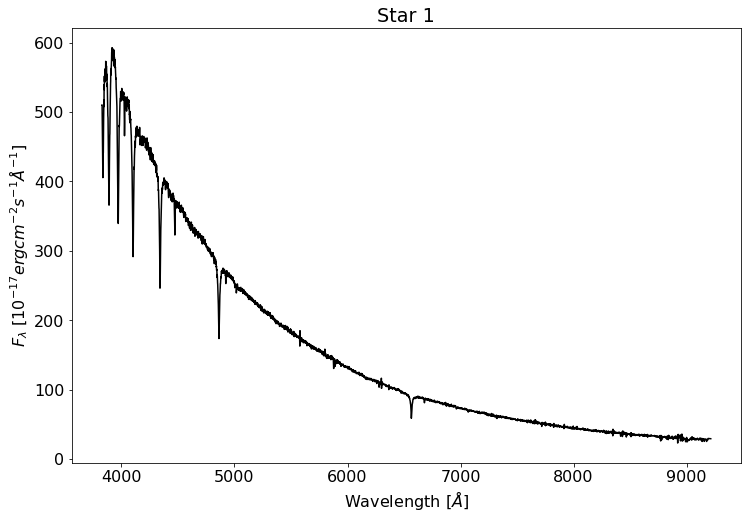

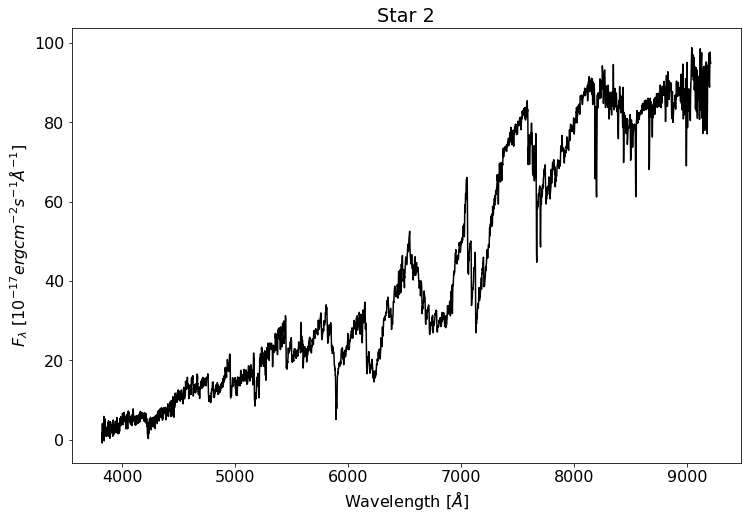

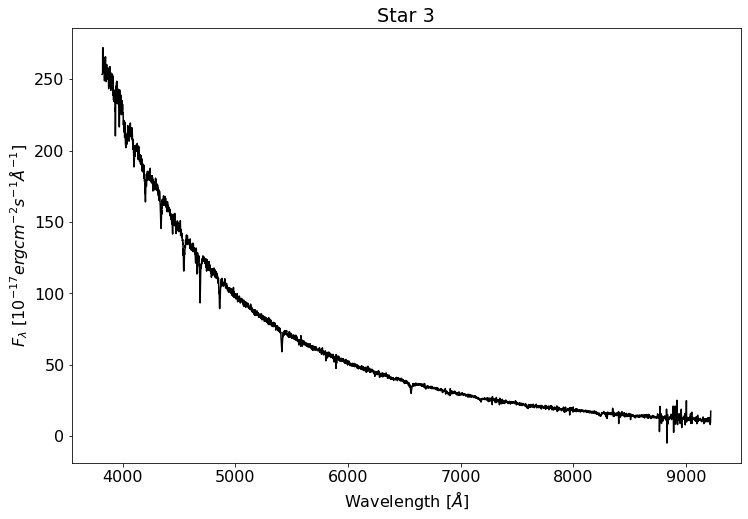

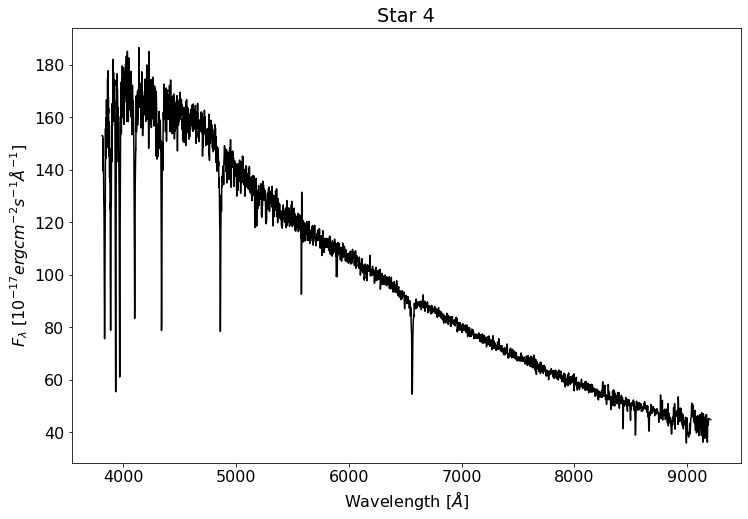

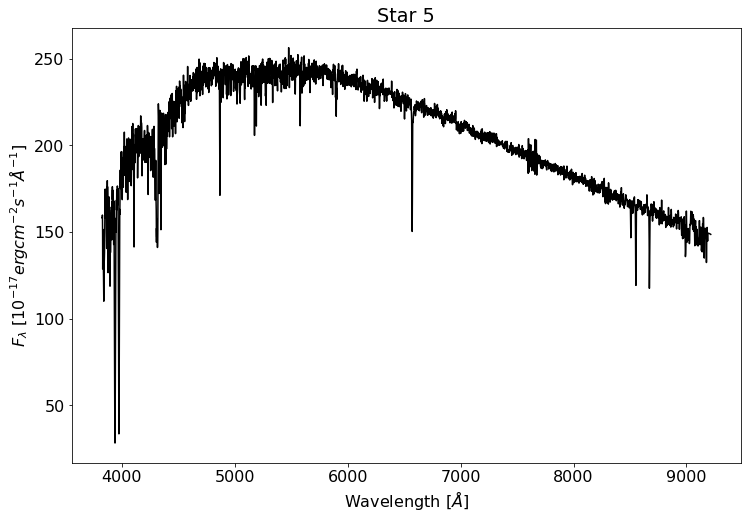

In [37]:
#The data of each star
star1 , star1hdr = getdata('star1.fit' , 0 , header = True)
star2 , star2hdr = getdata('star2.fit' , 0 , header = True)
star3 , star3hdr = getdata('star3.fit' , 0 , header = True)
star4 , star4hdr = getdata('star4.fit' , 0 , header = True)
star5 , star5hdr = getdata('star5.fit' , 0 , header = True)

#The function to source the spectrum from the data
def spectrum(data , header):           
    wavelength = 10 ** (header['COEFF0'] +  header['COEFF1']* np.arange(header['NAXIS1']))
    flux = data[0]
    return wavelength , flux

# Plotting the spectra of the five stars:

titles = ['Star 1' , 'Star 2' , 'Star 3' , 'Star 4' , 'Star 5']
data_list = [star1 , star2 , star3 , star4 , star5]
header_list = [star1hdr , star2hdr , star3hdr , star4hdr , star5hdr]

for i , j , k in zip(data_list , header_list , titles):
    
    plt.figure(figsize = (12, 8))
    plt.rcParams['font.size'] = '16'
    plt.plot(spectrum(i , j)[0] , spectrum(i , j)[1] , color = 'black')
    plt.title(k)
    plt.xlabel('Wavelength [$\AA$]')
    plt.ylabel('$F_\lambda$ $[10^{-17} erg cm^{-2} s^{-1} \AA^{-1}]$')
    plt.show()

# 2.(b)

In [38]:
000000000

0

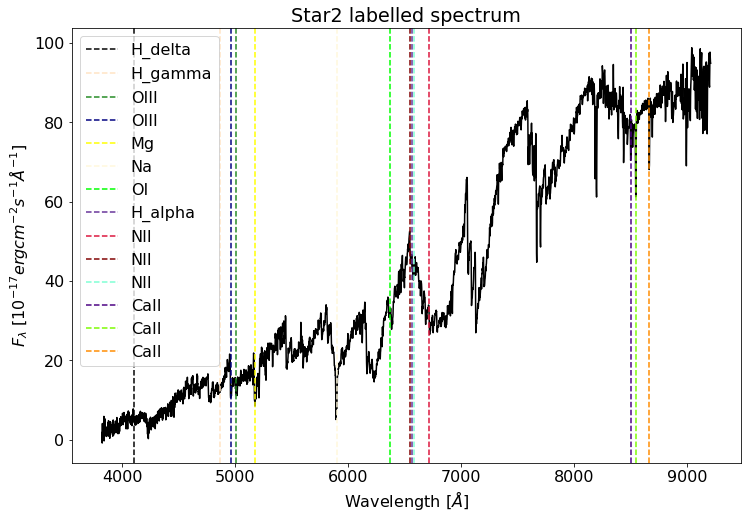

In [39]:
#Identifying the lines for star2
star2_lines = [4102.89 , 4862.68 , 5008.240 , 4960.295 , 5176.7 , 5895.6 , 6365.536 , 6564.61 , 6718.29 , 6549.86 , 6585.27 ,
               8500.36 , 8544.44 , 8664.52 , ]
line_names = ['H_delta' , 'H_gamma' , 'OIII' , 'OIII' , 'Mg' , 'Na' , 'OI' , 'H_alpha' , 'NII' , 'NII' , 'NII' ,
              'CaII' , 'CaII' , 'CaII']
colors = ['black' , 'bisque' , 'forestgreen' , 'navy' , 'yellow' , 'cornsilk' , 'lime' , 'rebeccapurple' , 'crimson' ,
          'maroon' , 'aquamarine' , 'indigo' , 'lawngreen' , 'darkorange']

plt.figure(figsize = (12, 8))
plt.rcParams['font.size'] = '16'
plt.plot(spectrum(star2 , star2hdr)[0] , spectrum(star2 , star2hdr)[1] , color = 'black')
for line , name , colour in zip(star2_lines , line_names , colors):
    plt.axvline(x = line    , color = colour , label = name , linestyle = '--')
plt.title('Star2 labelled spectrum')
plt.xlabel('Wavelength [$\AA$]')
plt.ylabel('$F_\lambda$ $[10^{-17} erg cm^{-2} s^{-1} \AA^{-1}]$')

plt.legend()
plt.show()

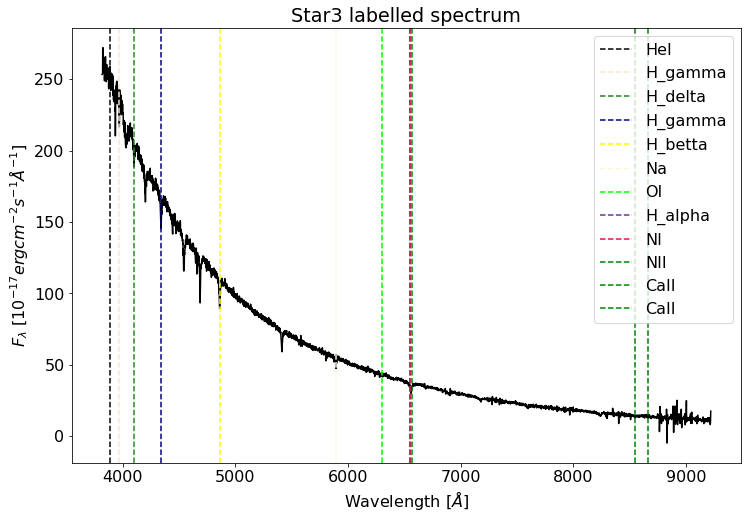

In [40]:
#Identifying the lines for star3
star3_lines = [3889.0 , 3969.588 , 4102.89 , 4341.68 , 4862.68 , 5895.6 , 6302.046 , 6549.86 , 6549.86 , 6564.61 , 8664.52 , 
               8544.44 , 8500.36]
line_names = ['HeI' , 'H_gamma' , 'H_delta'  , 'H_gamma'  , 'H_betta' , 'Na' , 'OI' , 'H_alpha' , 
              'NI' , 'NII' , 'CaII' , 'CaII' , 'CaII']
colors = ['black' , 'bisque' , 'forestgreen' , 'navy' , 'yellow' , 'cornsilk' , 'lime' , 
          'rebeccapurple' , 'crimson' , 'green' , 'green' , 'green']

plt.figure(figsize = (12, 8))
plt.rcParams['font.size'] = '16'
plt.plot(spectrum(star3 , star3hdr)[0] , spectrum(star3 , star3hdr)[1] , color = 'black')
for line , name , colour in zip(star3_lines , line_names , colors):
    plt.axvline(x = line    , color = colour , label = name , linestyle = '--')

plt.title('Star3 labelled spectrum')
plt.xlabel('Wavelength [$\AA$]')
plt.ylabel('$F_\lambda$ $[10^{-17} erg cm^{-2} s^{-1} \AA^{-1}]$')

plt.legend()
plt.show()

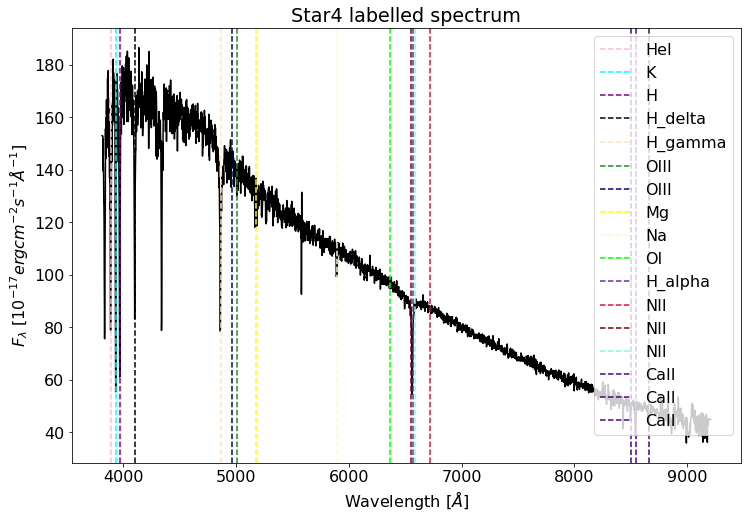

In [41]:
#Identifying the lines for star4
star4_lines = [3889.0 , 3934.777 , 3969.588 , 4102.89 , 4862.68 , 5008.240 , 4960.295 , 5176.7 , 5895.6 , 6365.536 , 6564.61 , 6718.29 , 6549.86 , 6585.27 ,
               8500.36 , 8544.44 , 8664.52  ]
line_names = ['HeI' , 'K' , 'H' , 'H_delta' , 'H_gamma' , 'OIII' , 'OIII' , 'Mg' , 'Na' , 'OI' , 'H_alpha' , 'NII' , 'NII' , 'NII' ,
              'CaII' , 'CaII' , 'CaII']
colors = ['pink' , 'cyan', 'purple' , 'black' , 'bisque' , 'forestgreen' , 'navy' , 'yellow' , 'cornsilk' , 'lime' , 'rebeccapurple' , 'crimson' ,
          'maroon' , 'aquamarine' , 'indigo' , 'indigo' , 'indigo']

plt.figure(figsize = (12, 8))
plt.rcParams['font.size'] = '16'
plt.plot(spectrum(star4 , star4hdr)[0] , spectrum(star4 , star4hdr)[1] , color = 'black')
for line , name , colour in zip(star4_lines , line_names , colors):
    plt.axvline(x = line    , color = colour , label = name , linestyle = '--')
    
plt.title('Star4 labelled spectrum')
plt.xlabel('Wavelength [$\AA$]')
plt.ylabel('$F_\lambda$ $[10^{-17} erg cm^{-2} s^{-1} \AA^{-1}]$')

plt.legend()
plt.show()

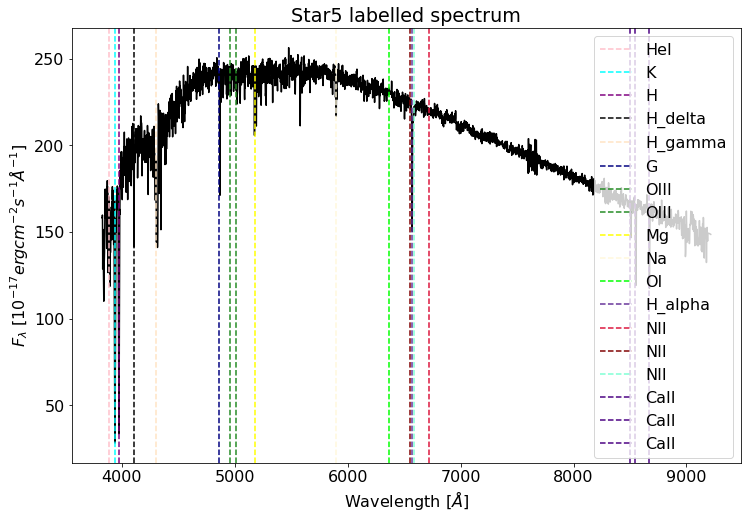

In [42]:
#Identifying the lines for star5
star5_lines = [3889.0 , 3934.777 , 3969.588 , 4102.89 , 4305.61 , 4862.68 , 5008.240 , 4960.295 , 5176.7 , 5895.6 , 
               6365.536 , 6564.61 , 6718.29 , 6549.86 , 6585.27 , 8500.36 , 8544.44 , 8664.52 ]
line_names = ['HeI' , 'K' , 'H' , 'H_delta' , 'H_gamma' , 'G' , 'OIII' , 'OIII' , 'Mg' , 'Na' , 'OI' , 
              'H_alpha' , 'NII' , 'NII' , 'NII' , 'CaII' , 'CaII' , 'CaII']
colors = ['pink' , 'cyan', 'purple' , 'black' , 'bisque' , 'navy' , 'forestgreen' , 'forestgreen' , 'yellow' , 
          'cornsilk' , 'lime' , 'rebeccapurple' , 'crimson' , 'maroon' , 'aquamarine' , 'indigo' , 'indigo' , 
          'indigo']

plt.figure(figsize = (12, 8))
plt.rcParams['font.size'] = '16'
plt.plot(spectrum(star5 , star5hdr)[0] , spectrum(star5 , star5hdr)[1] , color = 'black')
for line , name , colour in zip(star5_lines , line_names , colors):
    plt.axvline(x = line    , color = colour , label = name , linestyle = '--')

plt.title('Star5 labelled spectrum')
plt.xlabel('Wavelength [$\AA$]')
plt.ylabel('$F_\lambda$ $[10^{-17} erg cm^{-2} s^{-1} \AA^{-1}]$')

plt.legend()
plt.show()

# 2.(c)

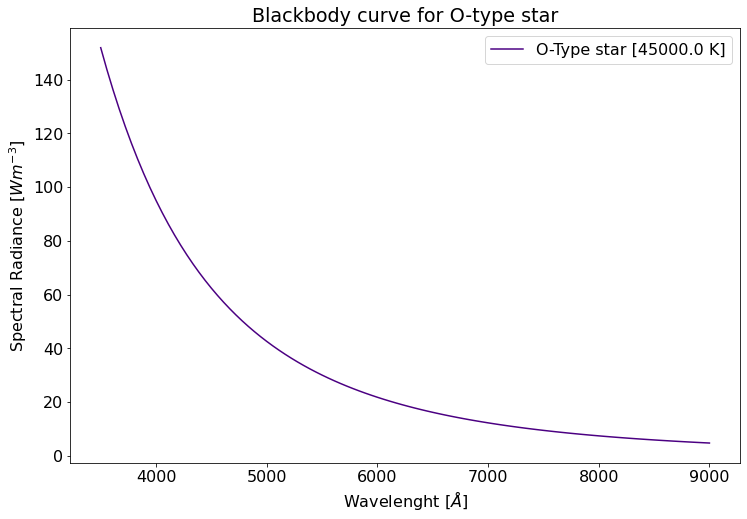

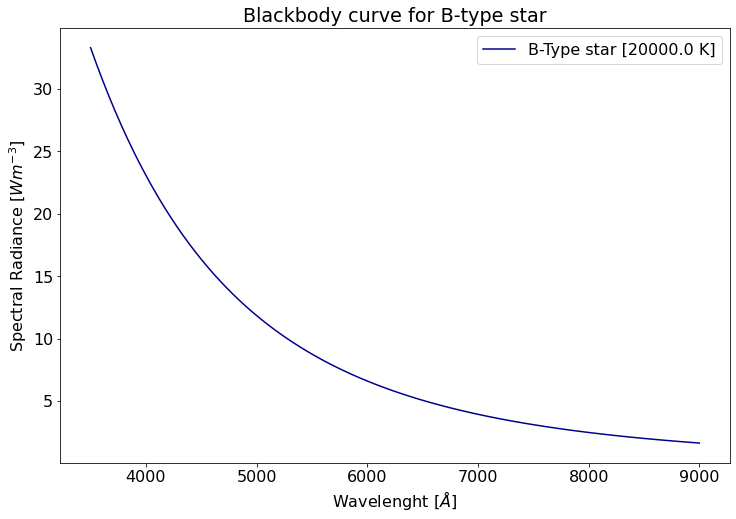

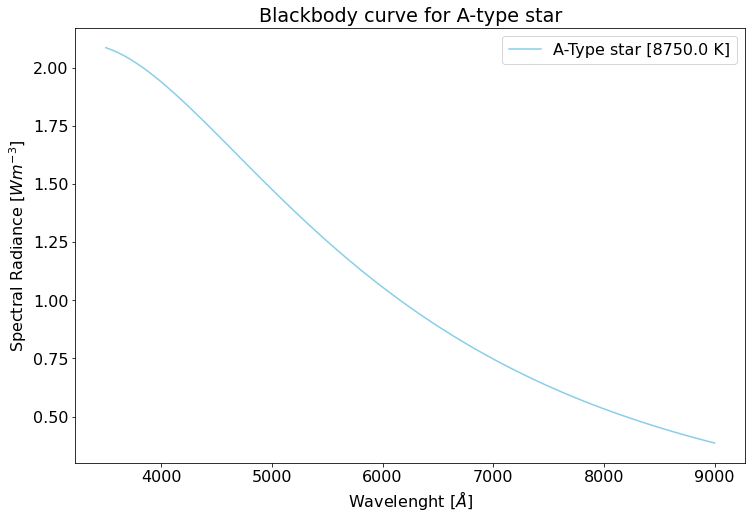

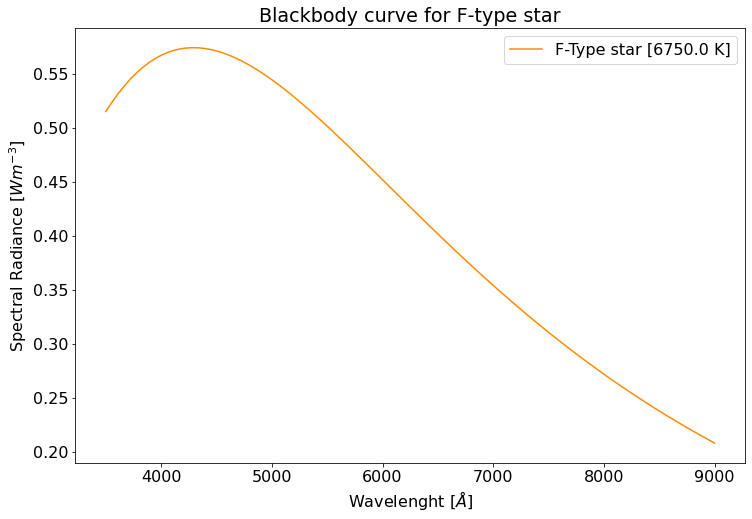

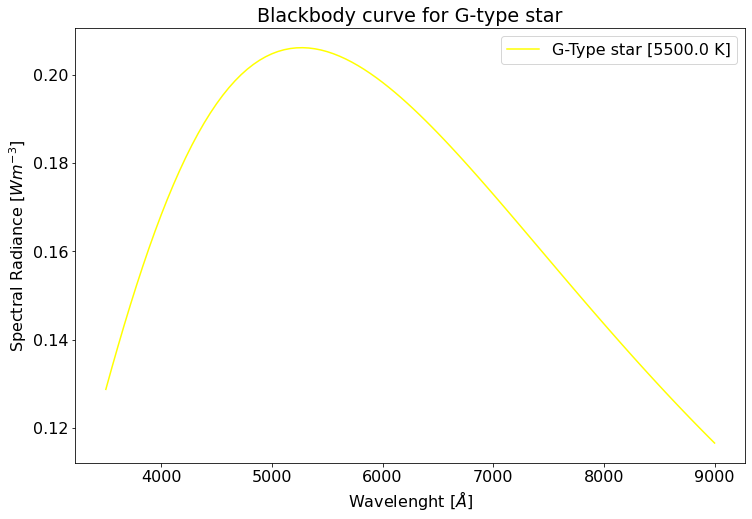

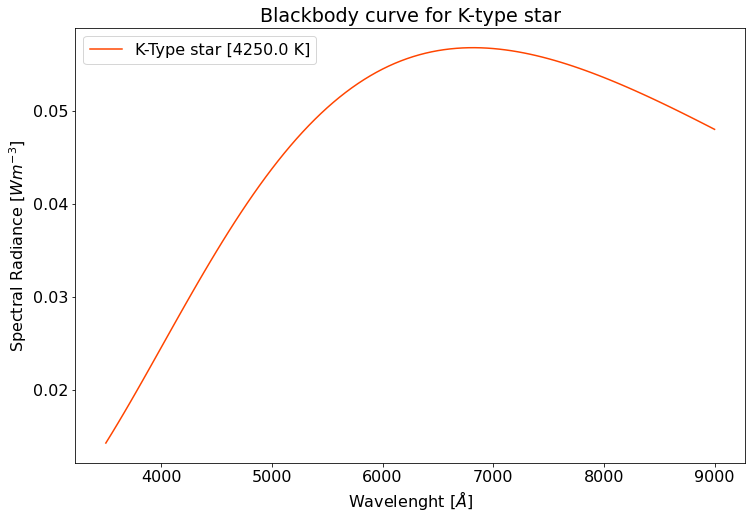

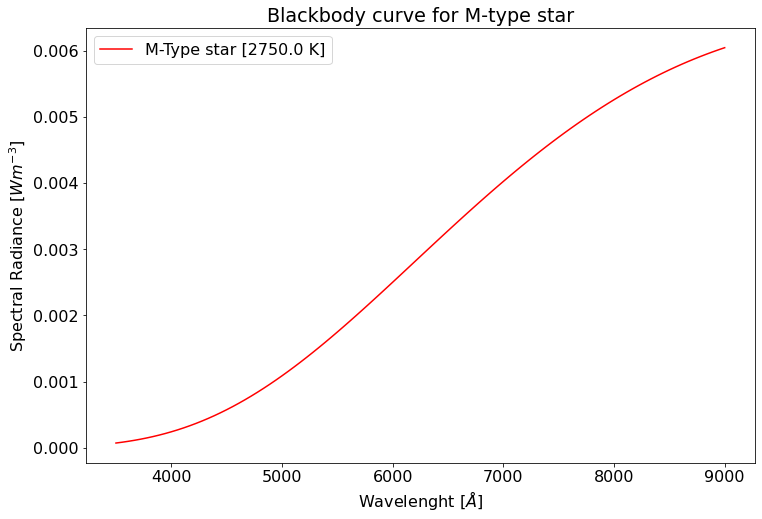

In [43]:
# Converting the flux output units of the blackboby equation in 1.(a) from W/m^3 to 10^-17 erg cm^-2 s^-1 Angstrong^-1:
def B_lambda(Lambda , Temp):
    #converting the inputs
    Lambda_m = Lambda.to(u.m) #meters
    Temp_K = Temp.to(u.K)     #Kelvin 
    
    #constants
    Plank = c.h               #Joule second
    Boldzmann = c.k_B         #Joule per Kelvin
    light = c.c               #meters per second
    
    a = (2 * Plank * (light ** 2)) / (Lambda_m ** 5)
    b = 1 / (np.exp((Plank * light) / (Lambda * Boldzmann * Temp_K)) - 1)
             
    results = (a * b).to( (u.W) / u.cm ** 2 / u.AA  )
    
    return results# the flux is in the units 10^-17 erg cm^-2 s^-1 Angstrong^-1

wavelength = (np.linspace(3500 , 9000 , 100)) * u.Angstrom

def plotting_func ():  
    spectral_class = ['O' , 'B' , 'A' , 'F' , 'G' , 'K' , 'M']
    stellar_temp = np.array([45000 , 20000 , 8750 , 6750 , 5500 , 4250 , 2750]) * u.K
    colour = ['indigo' , 'darkblue' , 'skyblue' , 'darkorange' , 'yellow' , 'orangered' , 'red' ]
    
    for i in range(7):    
        name = '{}-Type star [{}]'.format(spectral_class[i] , stellar_temp[i])
        
        plt.figure(figsize = (12, 8))
        plt.rcParams['font.size'] = '16'
        plt.plot(wavelength , B_lambda(wavelength , stellar_temp[i]) , label = name , color = colour[i])
        plt.title('Blackbody curve for {}-type star'.format(spectral_class[i]))
        plt.xlabel('Wavelenght [$\AA$]')
        plt.ylabel('Spectral Radiance [$W m^{-3}$]')
        
        plt.legend()
        plt.savefig('{}star'.format(spectral_class[i]))
        plt.show()
        
plotting_func()

Lastly, I worked on analyzing the redshift properties of a QSO and an object, Source A, through the following steps:

3a)Plotting the QSO Template Spectrum:
I plotted the QSO template spectrum from SDSS provided in the file qso_template32.fit. The main spectral lines visible in the template were identified and labeled, noting that these correspond to rest-frame vacuum wavelengths.

3b)Plotting the Spectrum of Source A:
I plotted the spectrum of the object "Source A" using the data in the file sourceA.csv. This involved preparing the data for visualization and comparing it to the QSO template to identify features that might indicate redshifted lines or other characteristics of the object.

3c)plot of both the QSO and sourceA spectra

## 3.(a)

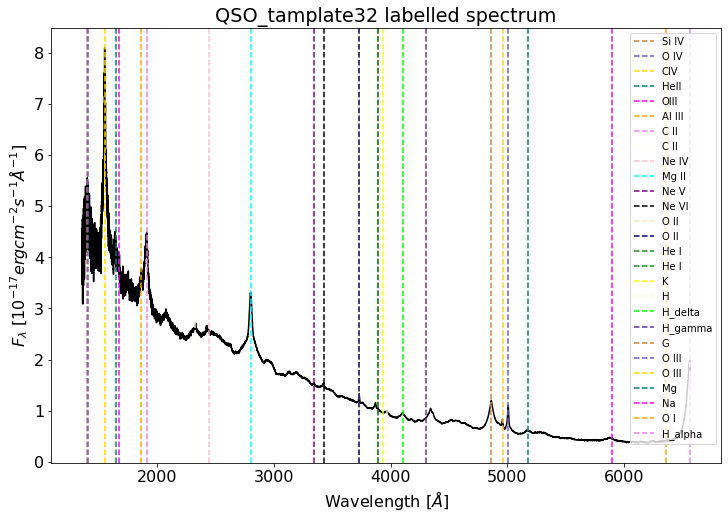

In [44]:
# The plot of QSO spectrum:
qso_template32_data , qso_template32_hdr =  getdata('qso_template32.fit' , 0 , header = True)

qso_lines = [1397.61 , 1399.8 , 1549.48 , 1640.4 , 1665.85 , 1857.4 , 1908.734 , 2326.0 , 2439.5 , 
             2799.117 , 3346.79 , 3426.85 , 3727.092 , 3729.875 , 3889.0 , 3889.0 , 3934.777 , 
             3969.588 , 4102.89 , 4305.61 , 4862.68 , 5008.240 , 4960.295 , 5176.7 , 5895.6 , 
             6365.536 , 6564.61]
line_names = ['Si IV' , 'O IV' , 'CIV' , 'HeII' , 'OIII' , 'Al III' , 'C II' , 'C II' , 'Ne IV' , 
              'Mg II' , 'Ne V', 'Ne VI' , 'O II' , 'O II' , 'He I' , 'He I' , 'K' , 'H' , 'H_delta' ,
              'H_gamma' , 'G' , 'O III' , 'O III' , 'Mg' , 'Na' , 'O I' , 'H_alpha']

colors = ['peru' , 'slateblue' , 'gold' , 'teal' , 'magenta' , 'orange' , 'violet' , 'ivory' , 'pink' , 
          'cyan', 'purple' ,  'black' , 'bisque' , 'navy' , 'forestgreen' , 'forestgreen' , 'yellow' ,
          'cornsilk' , 'lime' , 'rebeccapurple' , 'peru' , 'slateblue' , 'gold' , 'teal' , 'magenta' , 
          'orange' , 'violet']

plt.figure(figsize = (12, 8))
plt.rcParams['font.size'] = '16'
plt.plot(spectrum(qso_template32_data , qso_template32_hdr)[0] ,
         spectrum(qso_template32_data , qso_template32_hdr)[1] , color = 'black')
for line , name , colour in zip(qso_lines , line_names , colors):
    plt.axvline(x = line    , color = colour , label = name , linestyle = '--')

plt.title('QSO_tamplate32 labelled spectrum')
plt.xlabel('Wavelength [$\AA$]')
plt.ylabel('$F_\lambda$ $[10^{-17} erg cm^{-2} s^{-1} \AA^{-1}]$')

plt.legend(fontsize = '10')
plt.show()

## 3.(b)

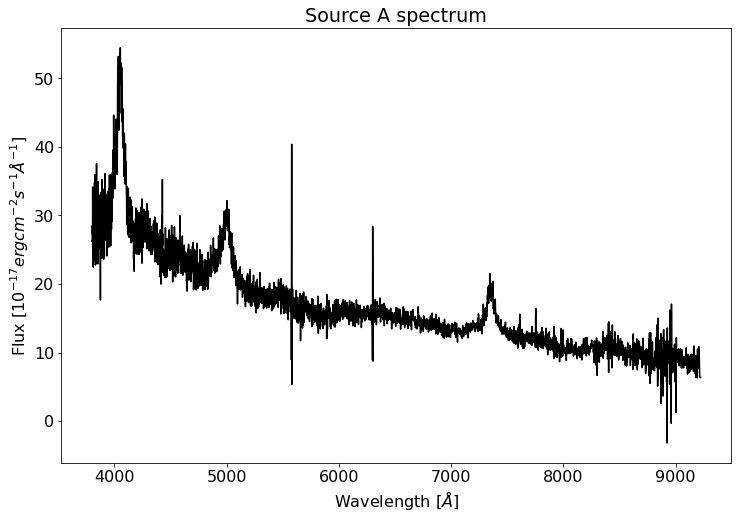

In [45]:
#The plot of sourceA spectrum
sourceA_data = np.loadtxt('sourceA.csv' , delimiter = ',' , skiprows = 1)

plt.figure(figsize = (12, 8))
plt.rcParams['font.size'] = '16'
plt.plot(sourceA_data[: , 0] , sourceA_data[: , 1] , color = 'black')

plt.title('Source A spectrum')
plt.xlabel('Wavelength [$\AA$]')
plt.ylabel('Flux $[10^{-17} erg cm^{-2} s^{-1} \AA^{-1}]$')
plt.savefig('sourceA')
plt.show()

## 3.(c)

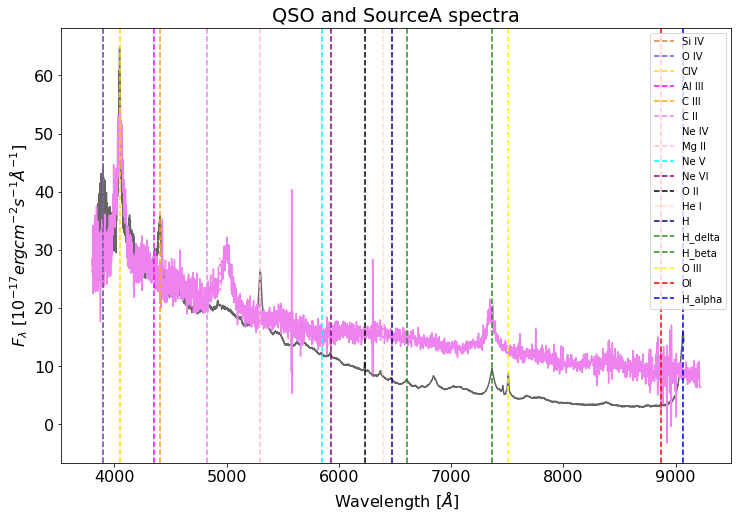

In [46]:
#The plot of both the QSO and sourceA spectra
sourceA_lines = [1397.61 , 1399.8 , 1549.48 , 1857.4 , 1908.734 , 2326.0 , 2439.5 , 2799.117 , 
                 3346.79 , 3426.85 ,3729.875 , 3889.0, 3969.588 , 4102.89 , 4862.68 , 5008.240 , 
                 6365.536 , 6564.61 ]

line_names = ['Si IV' , 'O IV' , 'CIV' , 'Al III' , 'C III' , 'C II' , 'Ne IV', 'Mg II', 'Ne V' , 
              'Ne VI' , 'O II' , 'He I' , 'H' , 'H_delta' , 'H_beta' , 'O III' , 'OI' , 'H_alpha']

colors = ['peru' , 'slateblue' , 'gold' , 'magenta' , 'orange' , 'violet' , 'ivory' , 'pink' , 
          'cyan', 'purple' ,  'black' , 'bisque' , 'navy' , 'forestgreen' , 'forestgreen' , 
          'yellow' , 'red' , 'blue']

plt.figure(figsize = (12, 8))
plt.plot(spectrum(qso_template32_data , qso_template32_hdr)[0] + 2500 ,
         spectrum(qso_template32_data , qso_template32_hdr)[1] * 8, color = '0.4')
plt.plot(sourceA_data[: , 0] , sourceA_data[: , 1] , color = 'violet')

for line , name , colour in zip(sourceA_lines , line_names , colors):
    plt.axvline(x = line + 2500    , color = colour , label = name , linestyle = '--')

plt.title('QSO and SourceA spectra')
plt.xlabel('Wavelength [$\AA$]')
plt.ylabel('$F_\lambda$ $[10^{-17} erg cm^{-2} s^{-1} \AA^{-1}]$')

plt.legend(fontsize = '10')
plt.savefig('QSO+A')
plt.show()